# Predictive Maintenance of Hydraulics System

[https://www.kaggle.com/mayank1897/condition-monitoring-of-hydraulic-systems](https://www.kaggle.com/mayank1897/condition-monitoring-of-hydraulic-systems)

In [58]:
import os
import multiprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tqdm

sns.set(font_scale=1.2)

## Data loading

### Attributes

In [37]:
def make_pressure_dataframe(fp, cycle_id=0):
    """ 100 Hz. 6000 samples in each cycle
    """
    data = pd.DataFrame(columns=[f'PS{i+1}' for i in range(6)])
    for i in range(6):
        data[f'PS{i+1}'] = np.loadtxt(fp + f'/PS{i+1}.txt.gz')[cycle_id]
    return data

In [38]:
df_ps = make_pressure_dataframe('../data/hydsys', cycle_id=0)
df_ps

,PS1,PS2,PS3,PS4,PS5,PS6
0,151.47,125.50,2.305,0.0,9.936,9.818
1,151.45,125.39,2.305,0.0,9.947,9.823
2,151.52,125.40,2.336,0.0,9.964,9.844
3,151.27,125.03,2.578,0.0,9.989,9.861
4,150.80,124.05,2.977,0.0,9.996,9.877
...,...,...,...,...,...,...
5995,151.16,124.91,2.383,0.0,9.715,9.599
5996,151.14,124.98,2.328,0.0,9.736,9.620
5997,151.10,125.11,2.250,0.0,9.745,9.639
5998,151.21,125.14,2.250,0.0,9.740,9.634


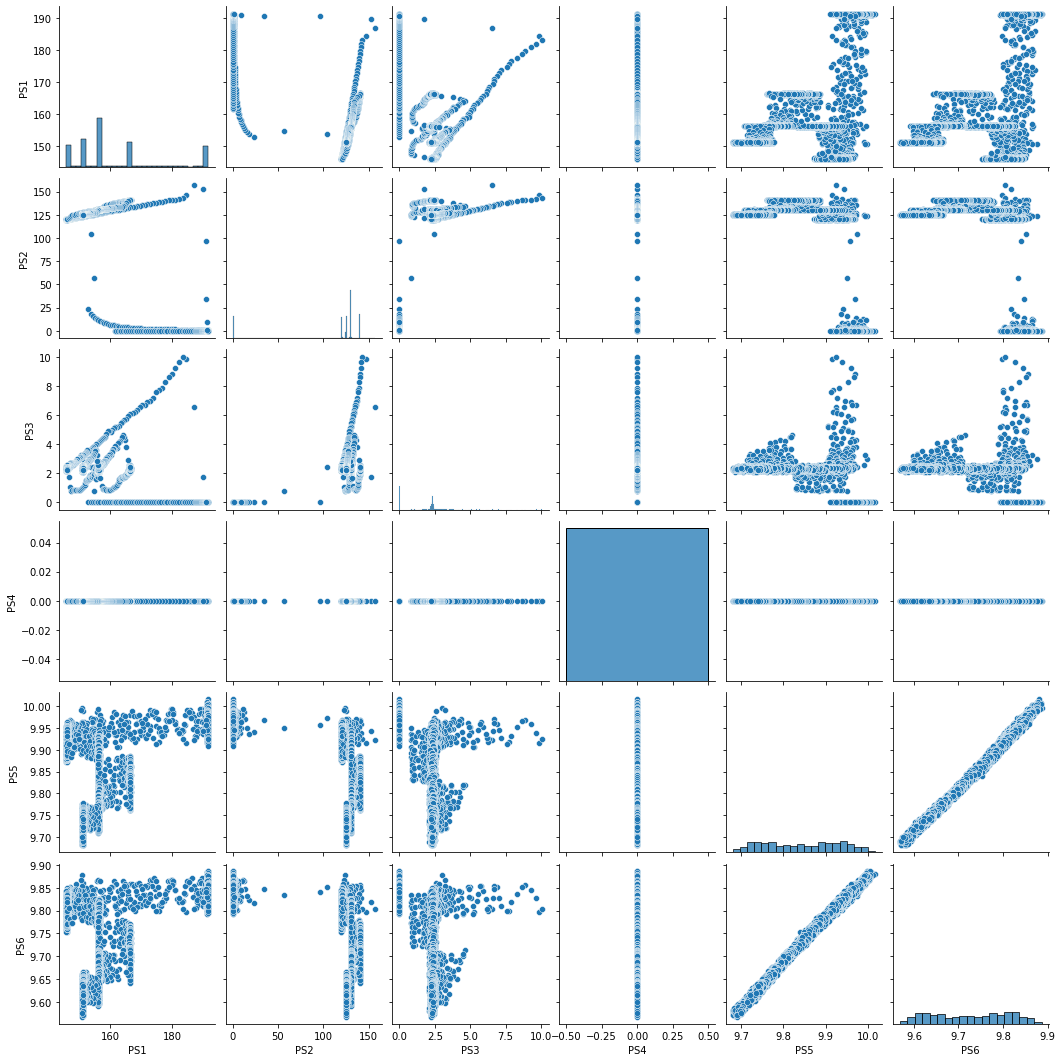

In [16]:
sns.pairplot(data=df_ps)

In [39]:
def make_motor_power_dataframe(fp, cycle_id=0):
    """ 100 Hz. 6000 samples in each cycle
    """
    return pd.DataFrame(np.loadtxt(fp + '/EPS1.txt.gz')[cycle_id],
        columns=['EPS1'])


<AxesSubplot:>

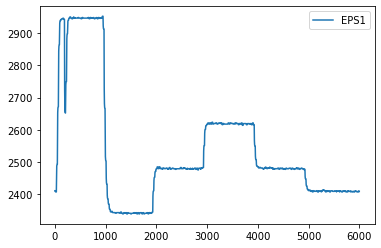

In [40]:
df_eps = make_motor_power_dataframe('../data/hydsys')
df_eps.plot()

In [23]:
def make_volume_flow_dataframe(fp, cycle_id=0):
    """ 10 Hz. 600 samples in each cycle
    """
    data = pd.DataFrame(columns=['FS1', 'FS2'])
    data['FS1'] = np.loadtxt(fp + '/FS1.txt.gz')[cycle_id]
    data['FS2'] = np.loadtxt(fp + '/FS2.txt.gz')[cycle_id]
    return data

<AxesSubplot:>

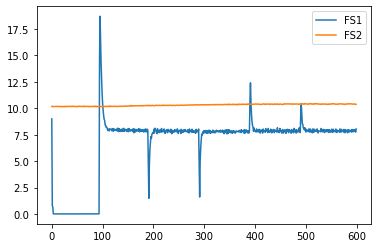

In [24]:
df_fs = make_volume_flow_dataframe('../data/hydsys')
df_fs.plot()

In [26]:
def make_temp_dataframe(fp, cycle_id=0):
    """ 1 Hz. 60 samples in each cycle
    """
    data = pd.DataFrame(columns=[f'TS{i+1}' for i in range(4)])
    data['TS1'] = np.loadtxt(fp + '/TS1.txt.gz')[cycle_id]
    data['TS2'] = np.loadtxt(fp + '/TS2.txt.gz')[cycle_id]
    data['TS3'] = np.loadtxt(fp + '/TS3.txt.gz')[cycle_id]
    data['TS4'] = np.loadtxt(fp + '/TS4.txt.gz')[cycle_id]
    return data

<AxesSubplot:>

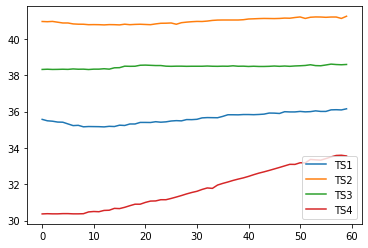

In [28]:
make_temp_dataframe('../data/hydsys').plot()

In [29]:
def make_vibration_dataframe(fp, cycle_id=0):
    return pd.DataFrame(np.loadtxt(fp + '/VS1.txt.gz')[cycle_id], columns=['VS1'])

<AxesSubplot:>

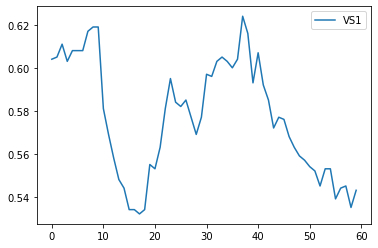

In [30]:
make_vibration_dataframe('../data/hydsys').plot()

In [33]:
def make_efficiency_dataframe(fp, cycle_id=0):
    return pd.DataFrame(np.loadtxt(fp + '/SE.txt.gz')[cycle_id], columns=['SE'])

<AxesSubplot:>

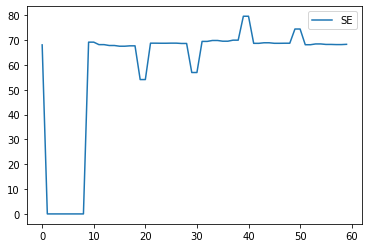

In [34]:
make_efficiency_dataframe('../data/hydsys').plot()

In [35]:
def make_cooling_dataframe(fp, cycle_id=0):
    data = pd.DataFrame(columns=['CE', 'CP'])
    data['CE'] = np.loadtxt(fp + '/CE.txt.gz')[cycle_id]
    data['CP'] = np.loadtxt(fp + '/CP.txt.gz')[cycle_id]
    return data

<AxesSubplot:>

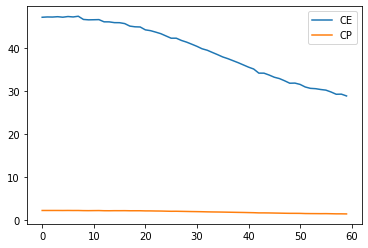

In [36]:
make_cooling_dataframe('../data/hydsys').plot()

### The target condition values

- Cooler condition / %:
    - 3: close to total failure
    - 20: reduced effifiency
    - 100: full efficiency
- Valve condition / %:
    - 100: optimal switching behavior
    - 90: small lag
    - 80: severe lag
    - 73: close to total failure
- Internal pump leakage:
    - 0: no leakage
    - 1: weak leakage
    - 2: severe leakage
- Hydraulic accumulator / bar:
    - 130: optimal pressure
    - 115: slightly reduced pressure
    - 100: severely reduced pressure
    - 90: close to total failure
- stable flag:
    - 0: conditions were stable
    - 1: static conditions might not have been reached yet

In [43]:
def make_condition_dataframe(fp):
    return pd.DataFrame(np.loadtxt(fp + '/profile.txt'),
        columns=[
            'cooler_condition',
            'valve_condition',
            'internal_pump_leakage',
            'hydraulic_accumulator',
            'stable_flag']).reset_index().rename(
                columns={'index': 'cycle'})

In [44]:
df_pf = make_condition_dataframe('../data/hydsys')
df_pf

,cycle,cooler_condition,valve_condition,internal_pump_leakage,hydraulic_accumulator,stable_flag
0,0,3.0,100.0,0.0,130.0,1.0
1,1,3.0,100.0,0.0,130.0,1.0
2,2,3.0,100.0,0.0,130.0,1.0
3,3,3.0,100.0,0.0,130.0,1.0
4,4,3.0,100.0,0.0,130.0,1.0
...,...,...,...,...,...,...
2200,2200,100.0,100.0,0.0,90.0,0.0
2201,2201,100.0,100.0,0.0,90.0,0.0
2202,2202,100.0,100.0,0.0,90.0,0.0
2203,2203,100.0,100.0,0.0,90.0,0.0


In [ ]:
# df_pf.iloc[200:500].stable_flag.plot()
# df_pf.iloc[0:].valve_condition.plot(legend=True)


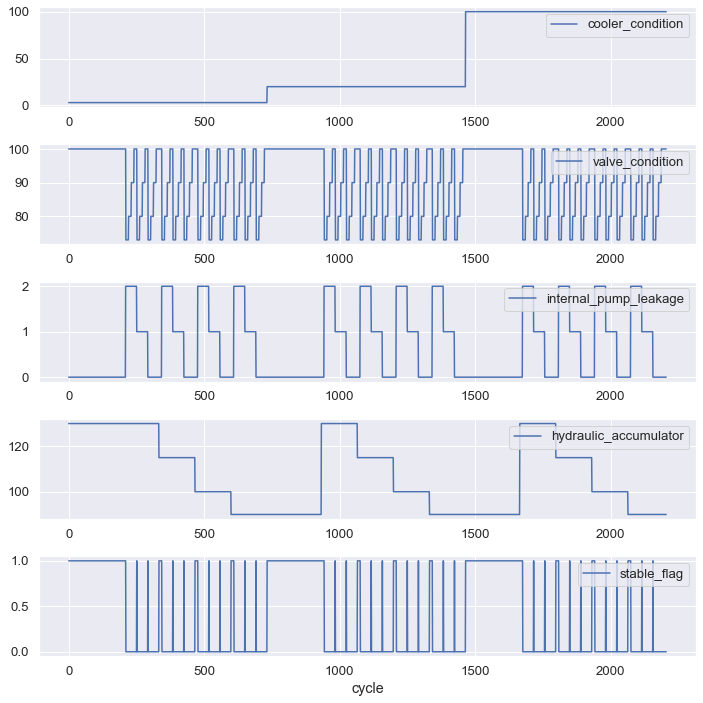

In [59]:
os.makedirs('../out', exist_ok=True)
fig, ax = plt.subplots(5, figsize=(10, 10))
for i, axi in enumerate(ax):
    df_pf.set_index('cycle').iloc[:, i].plot(legend=True, ax=axi)
    if i < 4:
        axi.set_xlabel(None)

fig.tight_layout()
fig.savefig('../out/hydsys_profile.png', 
            bbox_inches='tight')